In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
raw_data = pd.read_csv("CarSeats.csv")

In [89]:
raw_data.head()

,No,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,1,42,17,1,1
1,2,11.22,111,48,16,260,83,3,65,10,1,1
2,3,10.06,113,35,10,269,80,2,59,12,1,1
3,4,7.40,117,100,4,466,97,2,55,14,1,1
4,5,4.15,141,64,3,340,128,1,38,13,1,0


In [90]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           400 non-null    int64  
 1   Sales        400 non-null    float64
 2   CompPrice    400 non-null    int64  
 3   Income       400 non-null    int64  
 4   Advertising  400 non-null    int64  
 5   Population   400 non-null    int64  
 6   Price        400 non-null    int64  
 7   ShelveLoc    400 non-null    int64  
 8   Age          400 non-null    int64  
 9   Education    400 non-null    int64  
 10  Urban        400 non-null    int64  
 11  US           400 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 37.6 KB


In [91]:
raw_data["ShelveLoc"]=raw_data["ShelveLoc"].replace({"Bad":1,"Medium":2,"Good":3})
raw_data["US"]=raw_data["US"].replace({"Yes":1,"No":0})
raw_data["Urban"]=raw_data["Urban"].replace({"Yes":1,"No":0})

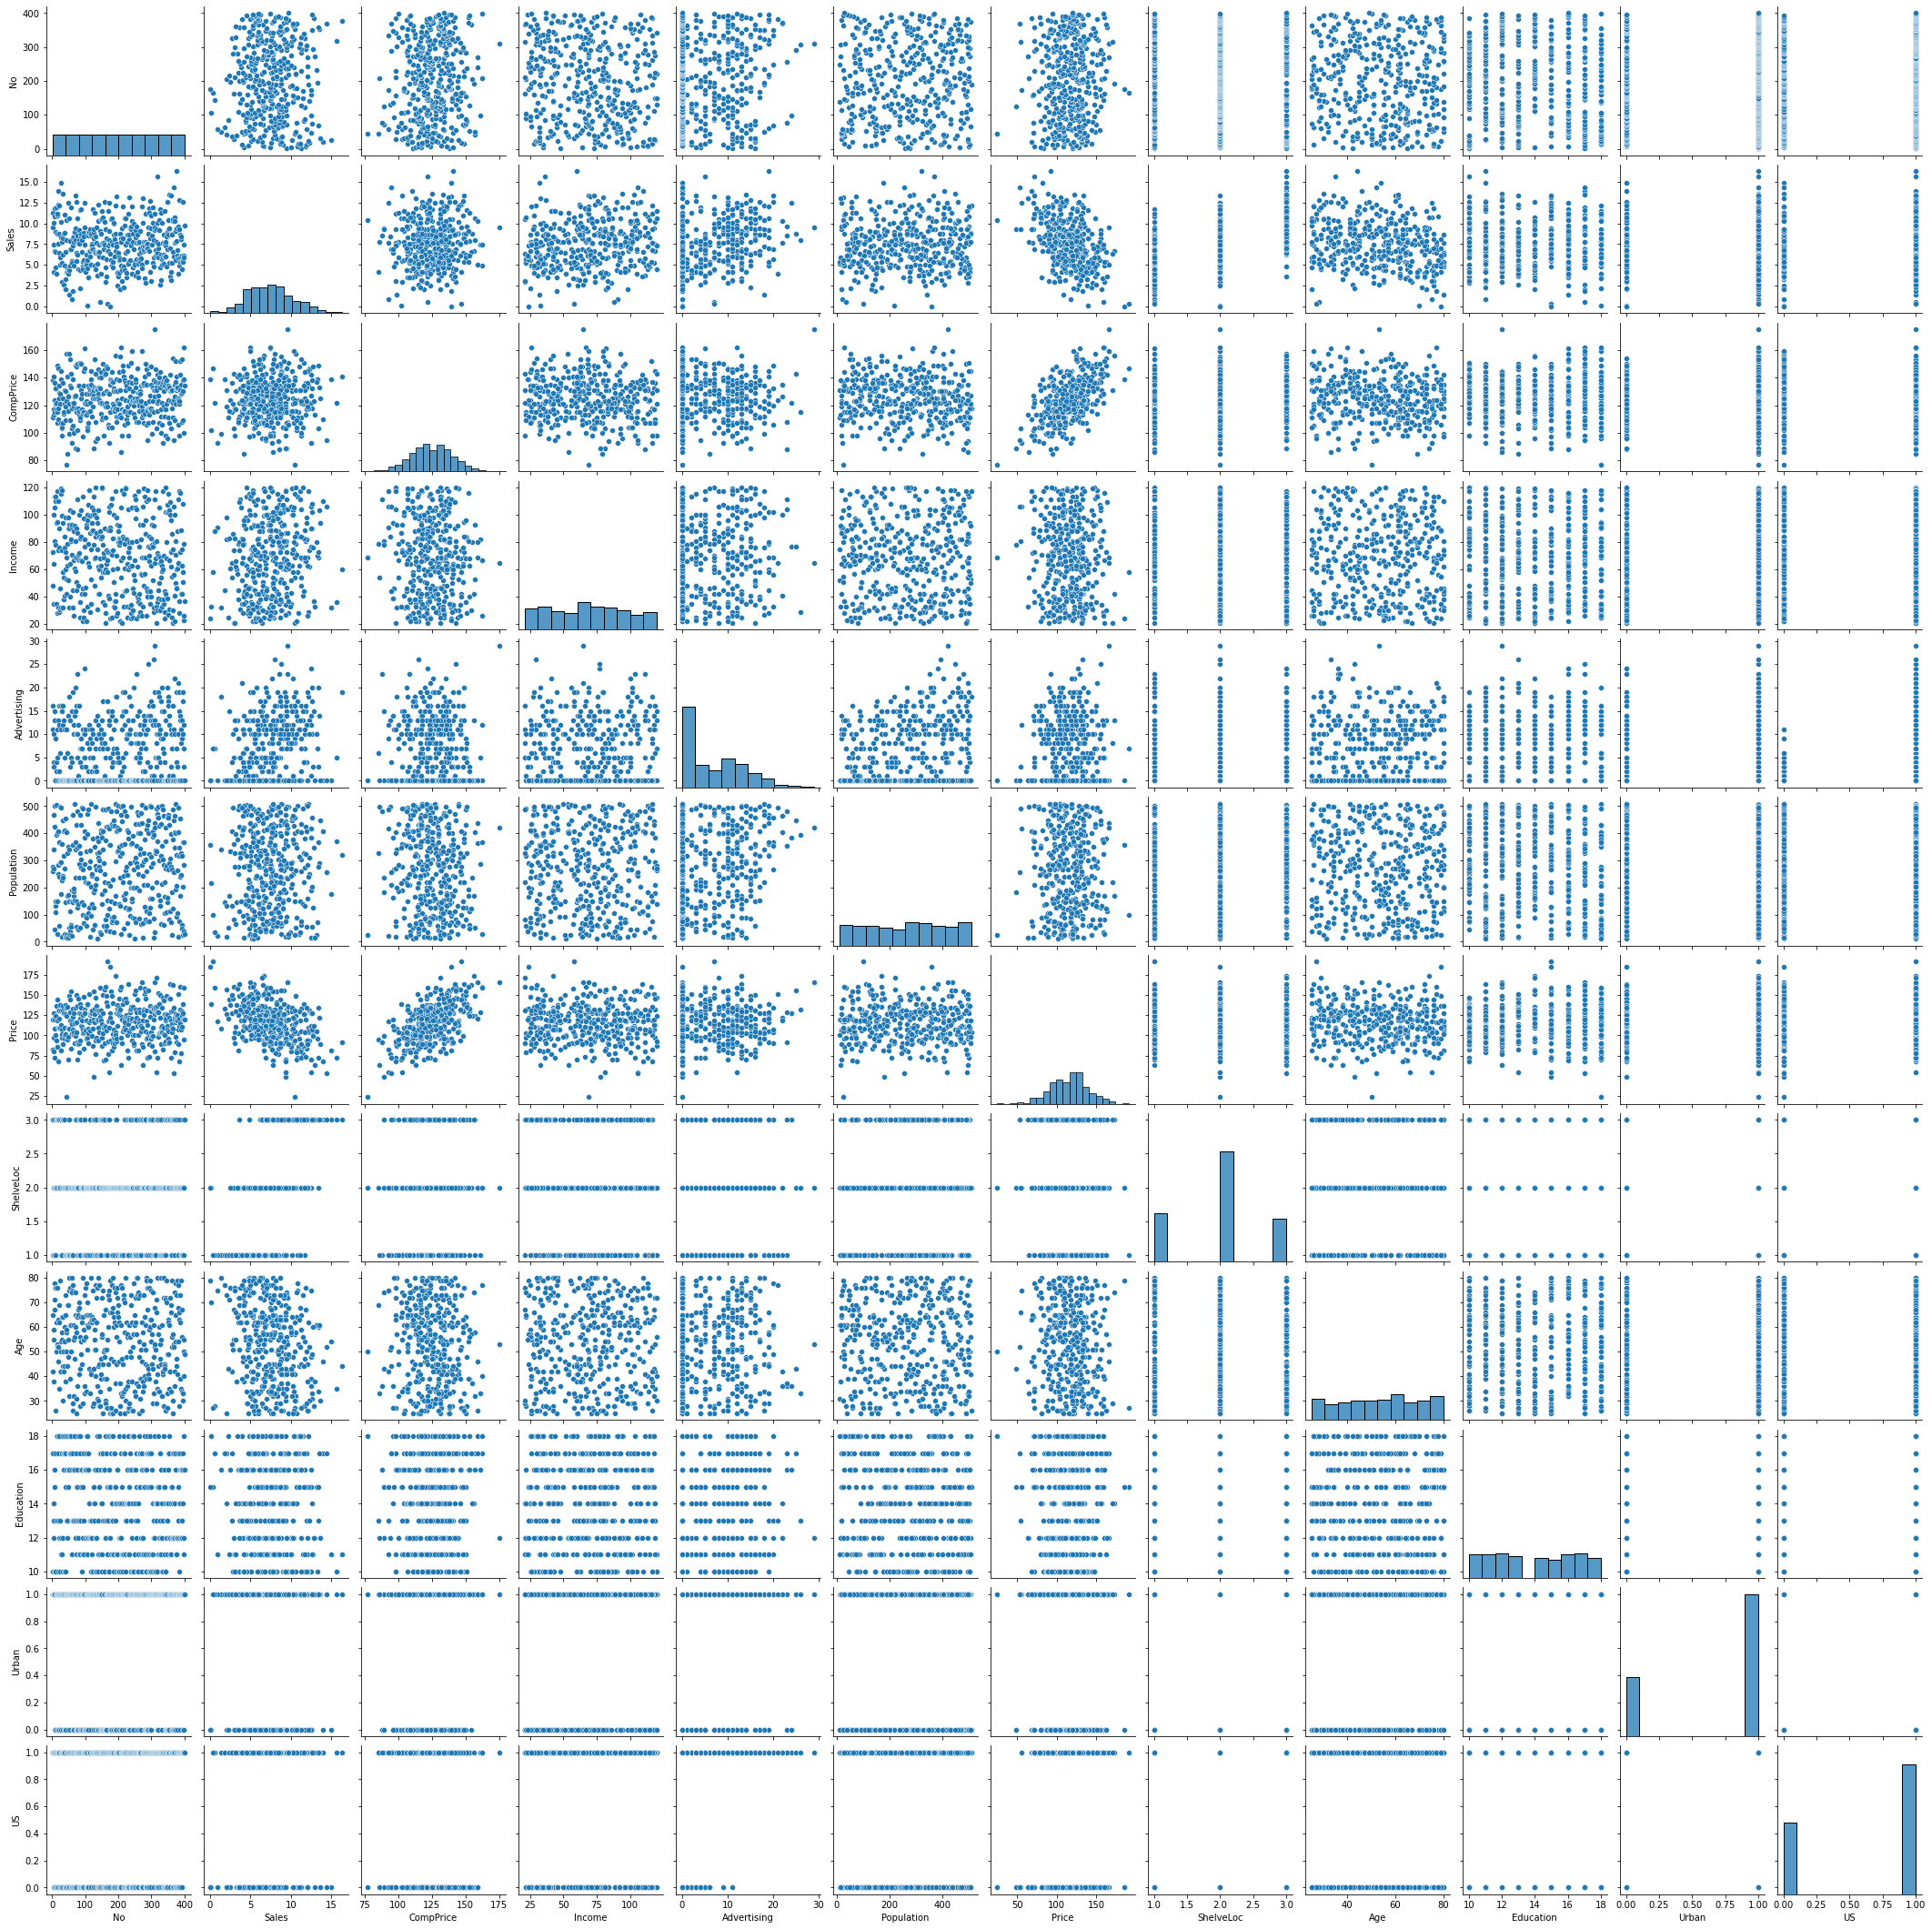

In [92]:
sns.pairplot(raw_data)

In [93]:
raw_data.columns

Index(['No', 'Sales', 'CompPrice', 'Income', 'Advertising', 'Population',
       'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [94]:
print(raw_data.isna().sum())

No             0
Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64


In [95]:
x = raw_data[['CompPrice', 'Income', 'Advertising', 'Population',
       'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']]

In [96]:
y = raw_data['Sales']

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
model = LinearRegression()

In [101]:
model.fit(x_train, y_train)

LinearRegression()

In [102]:
print(model.coef_)

[ 9.55792804e-02  1.46415358e-02  1.14253104e-01  3.04530506e-04
 -9.80941968e-02  2.39385032e+00 -4.60951679e-02 -2.89622160e-02
  8.95276291e-02 -4.10501534e-02]


In [103]:
print(model.intercept_)

3.161940361980534


In [104]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
CompPrice,0.095579
Income,0.014642
Advertising,0.114253
Population,0.000305
Price,-0.098094
ShelveLoc,2.393850
Age,-0.046095
Education,-0.028962
Urban,0.089528
US,-0.041050


In [105]:
predictions = model.predict(x_test)

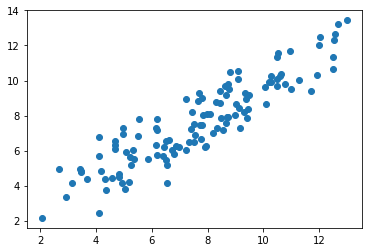

In [106]:
plt.scatter(y_test, predictions)

(array([ 4.,  5., 11., 16., 11., 27., 17., 18.,  9.,  2.]),
 array([-2.64596129, -2.14178585, -1.6376104 , -1.13343496, -0.62925951,
        -0.12508407,  0.37909138,  0.88326682,  1.38744227,  1.89161771,
         2.39579316]),
 <BarContainer object of 10 artists>)

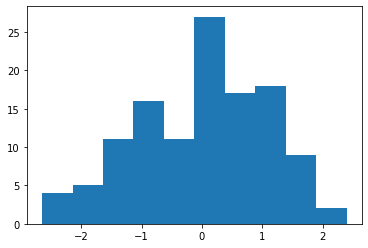

In [107]:
plt.hist(y_test - predictions)

In [108]:
from sklearn import metrics

In [109]:
metrics.mean_absolute_error(y_test, predictions)

0.898751549070815

In [110]:
metrics.mean_squared_error(y_test, predictions)

1.191883355760035

In [111]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1.0917341048808702